# Classification btw two classes bmw or nano

In [1]:
%matplotlib inline

import cv2
import numpy as np
import os
from skimage import io
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam

/home/sujeet/.local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/sujeet/.local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
#These are to import images and creates labels

base_path1 = '1bmw'
base_path2 = '2nano'

img_data_list = []
labels_list=[]
labels_img_list=[]

for img in os.listdir(base_path1):
    input_img=cv2.imread(base_path1+'/'+ img )
    input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
    input_img=cv2.resize(input_img,(150,150))
    #input_img=io.imread(dataset_path+'/'+img, as_grey=True)
    img_data_list.append(input_img)
    labels_list.append(int(base_path1[0]))
    labels_img_list.append(str(base_path1)+"_"+str(img).split('.')[0])


for img in os.listdir(base_path2):
    input_img=cv2.imread(base_path2+'/'+ img )
    input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
    input_img=cv2.resize(input_img,(150,150))
    #input_img=io.imread(dataset_path+'/'+img, as_grey=True
    img_data_list.append(input_img)
    labels_list.append(int(base_path2[0]))
    labels_img_list.append(str(base_path2)+"_"+str(img).split('.')[0])

In [11]:
#just to check labels
print(labels_list[0], labels_img_list[0])

1 1bmw_150150545


(150, 150)
200
200


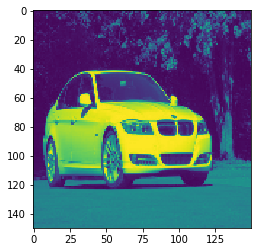

In [7]:
#just to ckeck images and its shape
plt.imshow(img_data_list[0])
#plt.imshow(input_img)
print(img_data_list[0].shape)
print(len(labels_list))
print(len(labels_img_list))

In [8]:
#number of classes: one for bmw cars and otherone is nano cars
nb_classes =2

In [12]:
#transforming data into desire array and y be into classes

X = np.array(img_data_list)
X = X.astype('float32')
X /= 255.

y = np.array(labels_list)
# convert class labels to on-hot encoding
y = np_utils.to_categorical((y-np.ones((200))), nb_classes)

#Shuffle the dataset
X,y = shuffle(X,y, random_state=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
    train_size=0.8, random_state = 20)

In [13]:
print(X_train.shape," ",X_test.shape)

(160, 150, 150)   (40, 150, 150)


In [14]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1], X_test.shape[2])

In [15]:
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (160, 1, 150, 150)
Testing matrix shape (40, 1, 150, 150)


In [28]:
#model

model = Sequential()
size =150
init = 'he_normal'
    
model.add(Convolution2D(64, 3, 3, activation='relu', border_mode='same', name='block1_conv1', init=init, input_shape=(1, size, size), subsample=(1, 1) ))
model.add(MaxPooling2D((3, 3), strides=(2, 2), name='block1_pool', dim_ordering='th'))

model.add(Convolution2D(64, 3, 3, activation='relu', border_mode='same', name='block2_conv1', init=init))
model.add(MaxPooling2D((3, 3), strides=(2, 2), name='block2_pool', dim_ordering='th'))

model.add(Convolution2D(64, 3, 3, activation='relu', border_mode='same', name='block3_conv1', init=init))
model.add(MaxPooling2D((3, 3), strides=(2, 2), name='block3_pool', dim_ordering='th'))

#model.add(Convolution2D(150, 3, 3, activation='relu', border_mode='same', name='block4_conv1', init=init))
#model.add(MaxPooling2D((3, 3), strides=(2, 2), name='block4_pool', dim_ordering='th'))
    
model.add(Flatten())
model.add(Dense(100, activation='relu', init='he_normal', name='fc1'))
model.add(Dropout(p=0.1))
model.add(Dense(100, activation='relu', init='he_normal', name='fc2'))
model.add(Dropout(p=0.1))

model.add(Dense(nb_classes, activation='softmax', name='predictions'))

#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=["accuracy"])
#model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=["accuracy"])

optim = adam(lr=0.001)
    
model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])

model.summary()

/home/sujeet/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", name="block1_conv1", input_shape=(1, 150, 1..., strides=(1, 1), padding="same", kernel_initializer="he_normal")`
  """
/home/sujeet/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D((3, 3), strides=(2, 2), name="block1_pool", data_format="channels_first")`
  
/home/sujeet/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", name="block2_conv1", padding="same", kernel_initializer="he_normal")`
  
/home/sujeet/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D((3, 3), strides=(2, 2), name="block2_pool", data_format="channels_first")`
  if __na

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 1, 150, 64)        86464     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 1, 74, 31)         0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 1, 74, 64)         17920     
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 1, 36, 31)         0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 1, 36, 64)         17920     
_________________________________________________________________
block3_pool (MaxPooling2D)   (None, 1, 17, 31)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 527)               0         
__________

In [82]:
#model.optimizer.lr.set_value(0.0005)
model.fit(X_train, y_train, batch_size=8, epochs=10)

Epoch 1/10
160/160 [==============================] - 1s 4ms/step - loss: 0.2364 - acc: 0.9250
Epoch 2/10
160/160 [==============================] - 1s 4ms/step - loss: 0.2252 - acc: 0.9250
Epoch 3/10
160/160 [==============================] - 1s 4ms/step - loss: 0.1254 - acc: 0.9563
Epoch 4/10
160/160 [==============================] - 1s 4ms/step - loss: 0.1062 - acc: 0.9500
Epoch 5/10
160/160 [==============================] - 1s 4ms/step - loss: 0.0883 - acc: 0.9563
Epoch 6/10
160/160 [==============================] - 1s 4ms/step - loss: 0.0742 - acc: 0.9937
Epoch 7/10
160/160 [==============================] - 1s 4ms/step - loss: 0.0816 - acc: 0.9688
Epoch 8/10
160/160 [==============================] - 1s 4ms/step - loss: 0.1315 - acc: 0.9625
Epoch 9/10
160/160 [==============================] - 1s 4ms/step - loss: 0.2553 - acc: 0.8938
Epoch 10/10
160/160 [==============================] - 1s 4ms/step - loss: 0.1263 - acc: 0.9375


In [83]:
loss, accuracy = model.evaluate(X_test,y_test, verbose=1)

40/40 [==============================] - 0s 2ms/step


In [84]:
loss

1.020967960357666

In [85]:
accuracy

0.775

In [86]:
predicted_classes = model.predict_classes(X_test)
predicted_classes 

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0])

In [87]:
correct_classified_indices=[]
incorrect_classified_indices=[]
correct_count=0
incorrect_count=0
for i in range(len(y_test)):
    print(i)
    v=y_test[i][predicted_classes[i]]
    print(v)
    if v==1:
        correct_classified_indices.append(1)
        incorrect_classified_indices.append(0)
        correct_count=correct_count+1;
    else:
        correct_classified_indices.append(0)
        incorrect_classified_indices.append(1)
        incorrect_count=incorrect_count+1;
#incorrect_classified_indices = np.nonzero(predicted_classes!=y_test[][predicted_classes])

0
1.0
1
1.0
2
1.0
3
1.0
4
1.0
5
1.0
6
0.0
7
0.0
8
1.0
9
1.0
10
1.0
11
1.0
12
1.0
13
1.0
14
1.0
15
1.0
16
1.0
17
0.0
18
0.0
19
1.0
20
1.0
21
1.0
22
1.0
23
0.0
24
1.0
25
1.0
26
0.0
27
0.0
28
1.0
29
1.0
30
1.0
31
1.0
32
1.0
33
1.0
34
1.0
35
1.0
36
0.0
37
1.0
38
1.0
39
0.0


In [88]:
correct_classified_indices

[1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0]

In [89]:
incorrect_classified_indices

[0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1]

In [90]:
correct_count

31

In [91]:
incorrect_count

9